# Coursework 2:
# Classifying cifar10 with Conv Nets


1. [problem trying to solve](#One)
2. [Measure of success](#Two)
3. [Validation Protocol](#Three)
4. [Data](#Four)
5. Models and results
    1. Two convolutional 1 dense
        1. [Model 1](#model1)
        2.[Model 2](#model2)
        3.[Model 3](#model3)
        4.[Model 4](#model4)
        5.[Model 5](#model5)
        6.[Model 6](#model6)
        7.[Model 7](#model7)
        8.[Model 8](#model8)
        9.[Model 9](#model9)
        10.[Model 10](#model10)
    2. Three convolutional 1 dense
        11. [Model 11](#model11)
        12.[Model 12](#model12)
        13.[Model 13](#model13)
        14.[Model 14](#model14)
        15.[Model 15](#model15)
        16.[Model 16](#model16)
6. [Training on the best model](#best)


## Step 1: Problem trying to solve
<a id='One'></a>
The problem I am trying to solve is a computer vision problem of identifying an coloured image. There are 10 different classes being airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. for further info on the data set [click here](https://www.cs.toronto.edu/~kriz/cifar.html)


## Step 2: Measure of success
<a id='Two'></a>
The measure of success will be the accuracy the has when selecting the type of image it is. This is because it is a classification problem rather than a regression problem. This means I will also use catergorical_crossentropy as my loss function

## Step 3: Chosing a validation protocol 
<a id='Three'></a>
I will use hold-out validation as my validation protocol because my dataset has 50,000 images to work with which will be enough data to work with

## Step 4: Preparing the Data
<a id='Four'></a>


In [1]:
#Modules for importation
import tensorflow
import numpy as np, matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10 as photos
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
(train_images,train_labels),(test_images,test_labels) = photos.load_data()

In [2]:
print(train_images.shape)
print(test_images.shape)
print(train_labels[0],train_labels[1])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[6] [9]


Firstly to normilise the data for the rgb channels:
Equation is 
\begin{align*}
 normalise = \frac{X_i - min(X)}{max(X) - min(X)}
\end{align*}

min(x) = 0
max(x) = 255

therefore it is simplified to: 

\begin{align*} 
 normalise = \frac{X_i}{max(X)}
\end{align*}


## Visualising the data of the model
should be equal distribution for them all

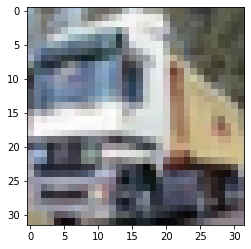

In [81]:
plt.imshow(train_images[1])
labelsCount = np.zeros((46))
bottomMax =np.zeros((46))


In [3]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(test_labels.shape)

train_images, test_images = train_images / 255.0, test_images / 255.0


(10000, 10)


In [91]:
# Function that plots val loss vs training loss
def plot_loss(history):

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    red = 'ro'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, red, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()
    
#function that plots val acc vs training acc  
def plot_acc(history):
    
    history_dict = history.history
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'ro', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    


# Beat the baseline
The baseline common sense model is 1/10 to beat which is beaten in model one

## Model one
<a id="model1"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 35s 1ms/sample - loss: 1.5912 - accuracy: 0.4218 - val_loss: 1.3515 - val_accuracy: 0.5137
Epoch 2/5
35000/35000 [==============================] - 34s 969us/sample - loss: 1.2796 - accuracy: 0.5433 - val_loss: 1.2248 - val_accuracy: 0.5679
Epoch 3/5
35000/35000 [==============================] - 34s 979us/sample - loss: 1.1503 - accuracy: 0.5937 - val_loss: 1.1572 - val_accuracy: 0.5938
Epoch 4/5
35000/35000 [==============================] - 34s 974us/sample - loss: 1.0352 - accuracy: 0.6349 - val_loss: 1.1495 - val_accuracy: 0.6019
Epoch 5/5
35000/35000 [==============================] - 34s 967us/sample - loss: 0.9508 - accuracy: 0.6654 - val_loss: 1.1562 - val_accuracy: 0.6108
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32) 

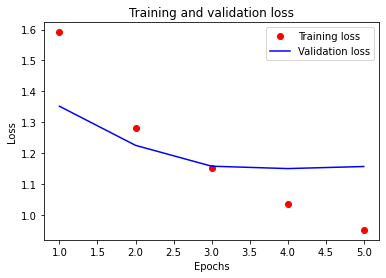

In [8]:
model_one = models.Sequential()
model_one.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_one.add(layers.MaxPooling2D((2, 2)))
model_one.add(layers.Conv2D(64, (5, 5), activation='relu'))

model_one.add(layers.Flatten())
model_one.add(layers.Dense(64, activation='relu'))
model_one.add(layers.Dense(10, activation='softmax'))

model_one.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_one = model_one.fit(train_images, train_labels, epochs=5,batch_size=32 ,validation_split=0.3)

model_one.summary()

plot_acc(history_one)
plot_loss(history_one)


## Now working out optimal epochs using callbacks 
<a id="Callbacks"></a>

In [13]:
callbacks_list = [
    tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1), # stop if no impr. for 1 epoch
    tensorflow.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                    monitor='val_loss', # only overwrites if loss improves
                                    save_best_only=True)
]
print("done")

done


## Model 2
<a id="model2"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 33s 929us/sample - loss: 1.5770 - accuracy: 0.4291 - val_loss: 1.3975 - val_accuracy: 0.4933
Epoch 2/50
35000/35000 [==============================] - 31s 898us/sample - loss: 1.2978 - accuracy: 0.5387 - val_loss: 1.2544 - val_accuracy: 0.5557
Epoch 3/50
35000/35000 [==============================] - 31s 897us/sample - loss: 1.1621 - accuracy: 0.5853 - val_loss: 1.2002 - val_accuracy: 0.5785
Epoch 4/50
35000/35000 [==============================] - 32s 906us/sample - loss: 1.0625 - accuracy: 0.6258 - val_loss: 1.1516 - val_accuracy: 0.5997
Epoch 5/50
35000/35000 [==============================] - 32s 905us/sample - loss: 0.9833 - accuracy: 0.6525 - val_loss: 1.1050 - val_accuracy: 0.6183
Epoch 6/50
35000/35000 [==============================] - 32s 913us/sample - loss: 0.9155 - accuracy: 0.6773 - val_loss: 1.0892 - val_accuracy: 0.6257
Epoch 7/50
35000/35000 [====================

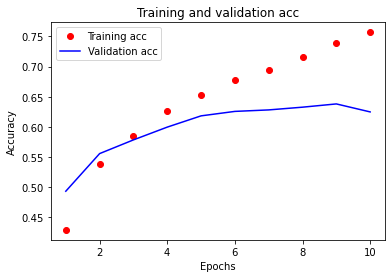

In [20]:
model_two = models.Sequential()
model_two.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_two.add(layers.MaxPooling2D((2, 2)))
model_two.add(layers.Conv2D(64, (5, 5), activation='relu'))

model_two.add(layers.Flatten())
model_two.add(layers.Dense(64, activation='relu'))
model_two.add(layers.Dense(10, activation='softmax'))

model_two.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_two = model_two.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

model_two.summary()

plot_acc(history_two)
plot_loss(history_two)



Model two has a low accuarcy to improve i will reduce the bottle neck of layer 1 but accuracy higher than in model 1 0.6381

## Model 3 
<a id="model3"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.5970 - accuracy: 0.4171 - val_loss: 1.4365 - val_accuracy: 0.4845
Epoch 2/50
35000/35000 [==============================] - 58s 2ms/sample - loss: 1.2906 - accuracy: 0.5368 - val_loss: 1.2424 - val_accuracy: 0.5560
Epoch 3/50
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.1462 - accuracy: 0.5937 - val_loss: 1.2310 - val_accuracy: 0.5663
Epoch 4/50
35000/35000 [==============================] - 55s 2ms/sample - loss: 1.0646 - accuracy: 0.6247 - val_loss: 1.1624 - val_accuracy: 0.6020
Epoch 5/50
35000/35000 [==============================] - 55s 2ms/sample - loss: 0.9810 - accuracy: 0.6526 - val_loss: 1.1602 - val_accuracy: 0.5982


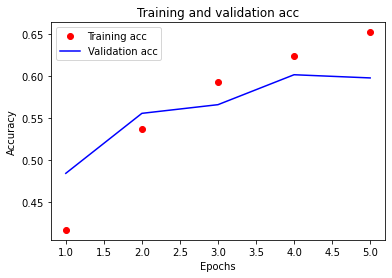

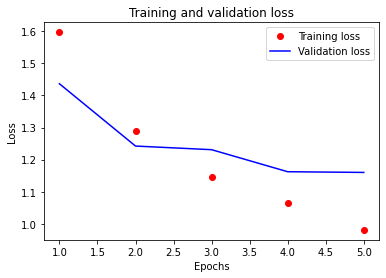

In [16]:
model_three = models.Sequential()
model_three.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_three.add(layers.MaxPooling2D((2, 2)))
model_three.add(layers.Conv2D(64, (5, 5), activation='relu'))

model_three.add(layers.Flatten())
model_three.add(layers.Dense(64, activation='relu'))
model_three.add(layers.Dense(10, activation='softmax'))

model_three.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_three = model_three.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_three)
plot_loss(history_three)


Overfitting is far more intense than model 2 therefore I will use dropout to try and decrease over fitting

## Model 4
<a id="model4"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 60s 2ms/sample - loss: 1.5963 - accuracy: 0.4210 - val_loss: 1.3628 - val_accuracy: 0.5099
Epoch 2/50
35000/35000 [==============================] - 58s 2ms/sample - loss: 1.3088 - accuracy: 0.5356 - val_loss: 1.2267 - val_accuracy: 0.5623
Epoch 3/50
35000/35000 [==============================] - 58s 2ms/sample - loss: 1.1788 - accuracy: 0.5825 - val_loss: 1.1515 - val_accuracy: 0.5969
Epoch 4/50
35000/35000 [==============================] - 59s 2ms/sample - loss: 1.0753 - accuracy: 0.6199 - val_loss: 1.0838 - val_accuracy: 0.6224
Epoch 5/50
35000/35000 [==============================] - 61s 2ms/sample - loss: 1.0040 - accuracy: 0.6435 - val_loss: 1.0694 - val_accuracy: 0.6289
Epoch 6/50
35000/35000 [==============================] - 60s 2ms/sample - loss: 0.9394 - accuracy: 0.6690 - val_loss: 1.0505 - val_accuracy: 0.6394
Epoch 7/50
35000/35000 [==============================] 

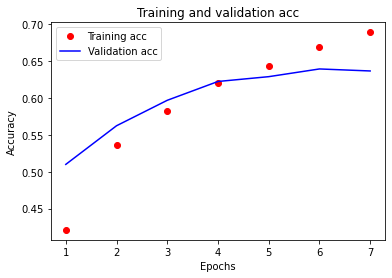

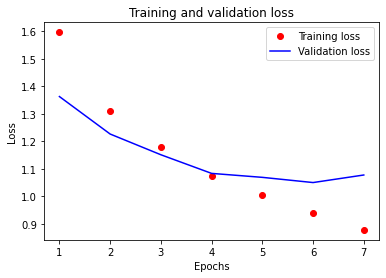

In [21]:
model_four = models.Sequential()
model_four.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_four.add(layers.MaxPooling2D((2, 2)))
model_four.add(layers.Dropout(0.5))
model_four.add(layers.Conv2D(64, (5, 5), activation='relu'))

model_four.add(layers.Flatten())
model_four.add(layers.Dense(64, activation='relu'))
model_four.add(layers.Dense(10, activation='softmax'))

model_four.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_four = model_four.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_four)
plot_loss(history_four)


Add another drop out layer before flatten to see if i can reduce overfitting some more 0.6394

## Model 5 
<a id="model5"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 62s 2ms/sample - loss: 1.6876 - accuracy: 0.3820 - val_loss: 1.4490 - val_accuracy: 0.4773
Epoch 2/50
35000/35000 [==============================] - 60s 2ms/sample - loss: 1.4031 - accuracy: 0.4939 - val_loss: 1.2816 - val_accuracy: 0.5464
Epoch 3/50
35000/35000 [==============================] - 61s 2ms/sample - loss: 1.2924 - accuracy: 0.5374 - val_loss: 1.2324 - val_accuracy: 0.5647
Epoch 4/50
35000/35000 [==============================] - 61s 2ms/sample - loss: 1.2242 - accuracy: 0.5626 - val_loss: 1.1174 - val_accuracy: 0.6100
Epoch 5/50
35000/35000 [==============================] - 62s 2ms/sample - loss: 1.1602 - accuracy: 0.5891 - val_loss: 1.1191 - val_accuracy: 0.6066


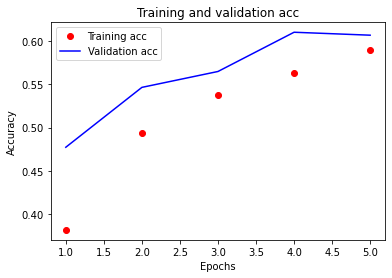

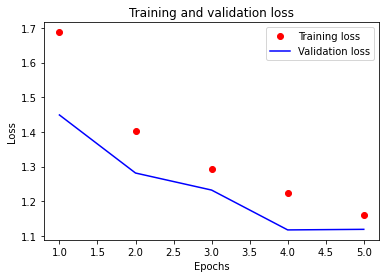

In [29]:
model_five = models.Sequential()
model_five.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_five.add(layers.MaxPooling2D((2, 2)))
model_five.add(layers.Dropout(0.5))
model_five.add(layers.Conv2D(64, (5, 5), activation='relu'))

model_five.add(layers.Dropout(0.5))
model_five.add(layers.Flatten())
model_five.add(layers.Dense(64, activation='relu'))
model_five.add(layers.Dense(10, activation='softmax'))

model_five.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_five = model_five.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_five)
plot_loss(history_five)


Overfitting but no improvement in validation accuracy maybe to much info loss so reduce second dropout

## Model 6
<a id="model6"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 61s 2ms/sample - loss: 1.6406 - accuracy: 0.3983 - val_loss: 1.4563 - val_accuracy: 0.4719
Epoch 2/50
35000/35000 [==============================] - 60s 2ms/sample - loss: 1.3546 - accuracy: 0.5170 - val_loss: 1.3021 - val_accuracy: 0.5426
Epoch 3/50
35000/35000 [==============================] - 59s 2ms/sample - loss: 1.2391 - accuracy: 0.5577 - val_loss: 1.2281 - val_accuracy: 0.5661
Epoch 4/50
35000/35000 [==============================] - 60s 2ms/sample - loss: 1.1497 - accuracy: 0.5918 - val_loss: 1.1512 - val_accuracy: 0.5979
Epoch 5/50
35000/35000 [==============================] - 62s 2ms/sample - loss: 1.0860 - accuracy: 0.6135 - val_loss: 1.0746 - val_accuracy: 0.6225
Epoch 6/50
35000/35000 [==============================] - 60s 2ms/sample - loss: 1.0170 - accuracy: 0.6411 - val_loss: 1.0763 - val_accuracy: 0.6261
Epoch 7/50
35000/35000 [==============================] 

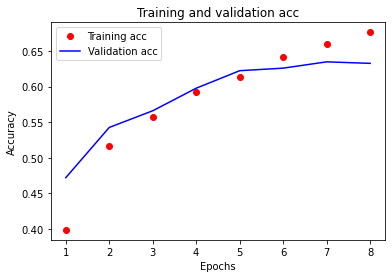

In [30]:
model_six = models.Sequential()
model_six.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_six.add(layers.MaxPooling2D((2, 2)))
model_six.add(layers.Dropout(0.5))
model_six.add(layers.Conv2D(64, (5, 5), activation='relu'))

model_six.add(layers.Dropout(0.25))
model_six.add(layers.Flatten())
model_six.add(layers.Dense(64, activation='relu'))
model_six.add(layers.Dense(10, activation='softmax'))

model_six.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_six = model_six.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_six)
plot_loss(history_six)

fit is good but accuaracy is pretty much the same as model 4

## Model 7
<a id="model7"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 73s 2ms/sample - loss: 1.5049 - accuracy: 0.4623 - val_loss: 1.3763 - val_accuracy: 0.5252
Epoch 2/50
35000/35000 [==============================] - 71s 2ms/sample - loss: 1.1357 - accuracy: 0.5999 - val_loss: 2.2293 - val_accuracy: 0.4107


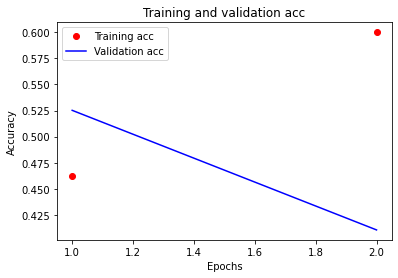

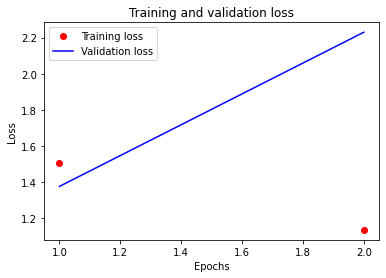

In [32]:
model_seven = models.Sequential()
model_seven.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_seven.add(layers.BatchNormalization())
model_seven.add(layers.MaxPooling2D((2, 2)))

model_seven.add(layers.Conv2D(64, (5, 5), activation='relu'))


model_seven.add(layers.Flatten())
model_seven.add(layers.Dense(64, activation='relu'))
model_seven.add(layers.Dense(10, activation='softmax'))

model_seven.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_seven = model_seven.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_seven)
plot_loss(history_seven)

Terrible model move batch normilisartion to after pooling

## Model 8 
<a id="model8"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 62s 2ms/sample - loss: 1.4975 - accuracy: 0.4650 - val_loss: 1.9442 - val_accuracy: 0.4030
Epoch 2/50
35000/35000 [==============================] - 62s 2ms/sample - loss: 1.1612 - accuracy: 0.5924 - val_loss: 1.5286 - val_accuracy: 0.5305
Epoch 3/50
35000/35000 [==============================] - 62s 2ms/sample - loss: 0.9827 - accuracy: 0.6574 - val_loss: 1.2144 - val_accuracy: 0.5900
Epoch 4/50
35000/35000 [==============================] - 61s 2ms/sample - loss: 0.8471 - accuracy: 0.7059 - val_loss: 1.2293 - val_accuracy: 0.6126
Epoch 5/50
35000/35000 [==============================] - 60s 2ms/sample - loss: 0.7461 - accuracy: 0.7405 - val_loss: 1.3161 - val_accuracy: 0.6054


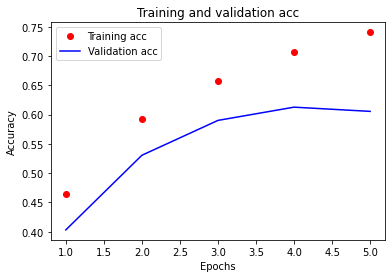

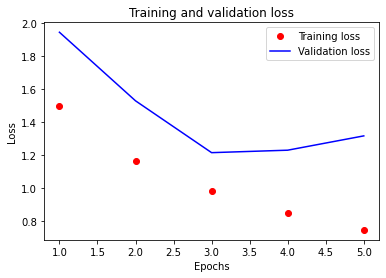

In [33]:
model_eight = models.Sequential()
model_eight.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))

model_eight.add(layers.MaxPooling2D((2, 2)))
model_eight.add(layers.BatchNormalization())
model_eight.add(layers.Conv2D(64, (5, 5), activation='relu'))


model_eight.add(layers.Flatten())
model_eight.add(layers.Dense(64, activation='relu'))
model_eight.add(layers.Dense(10, activation='softmax'))

model_eight.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_eight = model_eight.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_eight)
plot_loss(history_eight)

Much more useful model but accuracy is decreased and the model is still overfitting so I will reduce the window to conv to capture more information

## Model 9
<a id="model9"> </a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 29s 818us/sample - loss: 1.4687 - accuracy: 0.4695 - val_loss: 1.2066 - val_accuracy: 0.5697
Epoch 2/50
35000/35000 [==============================] - 28s 793us/sample - loss: 1.0936 - accuracy: 0.6171 - val_loss: 1.0876 - val_accuracy: 0.6285
Epoch 3/50
35000/35000 [==============================] - 28s 807us/sample - loss: 0.9349 - accuracy: 0.6726 - val_loss: 1.0600 - val_accuracy: 0.6325
Epoch 4/50
35000/35000 [==============================] - 28s 799us/sample - loss: 0.8201 - accuracy: 0.7156 - val_loss: 1.0113 - val_accuracy: 0.6541
Epoch 5/50
35000/35000 [==============================] - 28s 800us/sample - loss: 0.7226 - accuracy: 0.7475 - val_loss: 0.9875 - val_accuracy: 0.6695
Epoch 6/50
35000/35000 [==============================] - 28s 798us/sample - loss: 0.6243 - accuracy: 0.7824 - val_loss: 1.0041 - val_accuracy: 0.6669


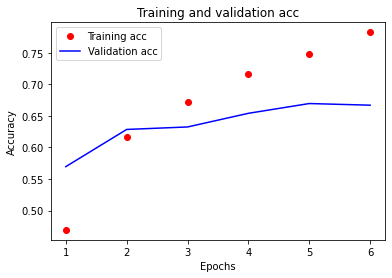

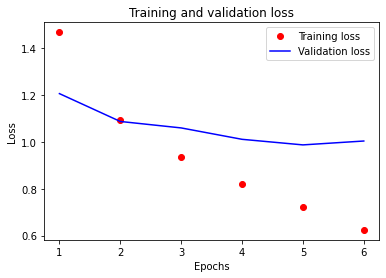

In [34]:
model_nine = models.Sequential()
model_nine.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model_nine.add(layers.MaxPooling2D((2, 2)))


model_nine.add(layers.Conv2D(64, (3, 3), activation='relu'))


model_nine.add(layers.Flatten())
model_nine.add(layers.Dense(64, activation='relu'))
model_nine.add(layers.Dense(10, activation='softmax'))

model_nine.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_nine = model_nine.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_nine)
plot_loss(history_nine)

Massive improvement in accuracy and not dramatic over fitting I will increase size of first layer. Best Model 9

## Model 10
<a id="model0"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 44s 1ms/sample - loss: 1.5545 - accuracy: 0.4379 - val_loss: 1.3920 - val_accuracy: 0.5085
Epoch 2/50
35000/35000 [==============================] - 43s 1ms/sample - loss: 1.1800 - accuracy: 0.5807 - val_loss: 1.1341 - val_accuracy: 0.6021
Epoch 3/50
35000/35000 [==============================] - 44s 1ms/sample - loss: 1.0331 - accuracy: 0.6353 - val_loss: 1.0560 - val_accuracy: 0.6303
Epoch 4/50
35000/35000 [==============================] - 44s 1ms/sample - loss: 0.9370 - accuracy: 0.6724 - val_loss: 1.0474 - val_accuracy: 0.6383
Epoch 5/50
35000/35000 [==============================] - 44s 1ms/sample - loss: 0.8548 - accuracy: 0.6997 - val_loss: 1.0244 - val_accuracy: 0.6483
Epoch 6/50
35000/35000 [==============================] - 44s 1ms/sample - loss: 0.7846 - accuracy: 0.7249 - val_loss: 1.0166 - val_accuracy: 0.6555
Epoch 7/50
35000/35000 [==============================] 

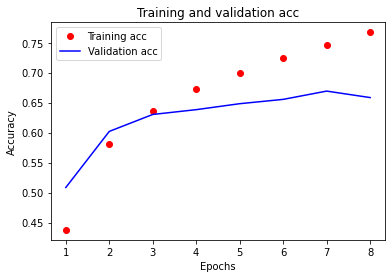

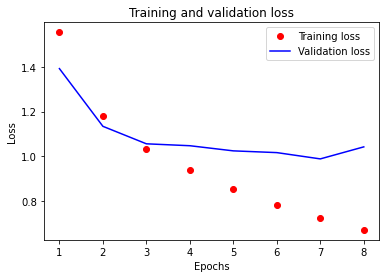

In [35]:
model_ten = models.Sequential()
model_ten.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model_ten.add(layers.MaxPooling2D((2, 2)))


model_ten.add(layers.Conv2D(64, (3, 3), activation='relu'))


model_ten.add(layers.Flatten())
model_ten.add(layers.Dense(64, activation='relu'))
model_ten.add(layers.Dense(10, activation='softmax'))

model_ten.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_ten = model_ten.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_ten)
plot_loss(history_ten)

Not any gain in accuracy therefore I will add another convolutional layer 

## Model 11
<a id="model11"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 22s 625us/sample - loss: 1.6251 - accuracy: 0.4026 - val_loss: 1.4537 - val_accuracy: 0.4719
Epoch 2/50
35000/35000 [==============================] - 21s 600us/sample - loss: 1.2640 - accuracy: 0.5499 - val_loss: 1.2358 - val_accuracy: 0.5657
Epoch 3/50
35000/35000 [==============================] - 21s 598us/sample - loss: 1.1210 - accuracy: 0.6039 - val_loss: 1.1267 - val_accuracy: 0.6017
Epoch 4/50
35000/35000 [==============================] - 21s 600us/sample - loss: 1.0241 - accuracy: 0.6365 - val_loss: 1.0381 - val_accuracy: 0.6349
Epoch 5/50
35000/35000 [==============================] - 21s 604us/sample - loss: 0.9400 - accuracy: 0.6694 - val_loss: 1.0018 - val_accuracy: 0.6519
Epoch 6/50
35000/35000 [==============================] - 22s 616us/sample - loss: 0.8755 - accuracy: 0.6899 - val_loss: 0.9892 - val_accuracy: 0.6539
Epoch 7/50
35000/35000 [====================

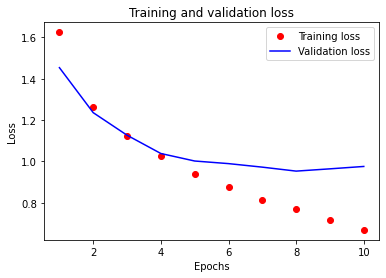

In [53]:
model_eleven = models.Sequential()
model_eleven.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_eleven.add(layers.MaxPooling2D((2, 2)))

model_eleven.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_eleven.add(layers.MaxPooling2D((2, 2)))

model_eleven.add(layers.Conv2D(64, (3, 3), activation='relu'))


model_eleven.add(layers.Flatten())
model_eleven.add(layers.Dense(64, activation='relu'))
model_eleven.add(layers.Dense(10, activation='softmax'))

model_eleven.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_eleven = model_eleven.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_eleven)
plot_loss(history_eleven)

2%-3% more accurate therefore I will increase the size of the second layer as overfitting isn't a real problem yet

## Model 12 (Best model)
<a id="model12"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 27s 782us/sample - loss: 1.6301 - accuracy: 0.4017 - val_loss: 1.3670 - val_accuracy: 0.5044
Epoch 2/50
35000/35000 [==============================] - 26s 752us/sample - loss: 1.2795 - accuracy: 0.5409 - val_loss: 1.2288 - val_accuracy: 0.5619
Epoch 3/50
35000/35000 [==============================] - 26s 749us/sample - loss: 1.1250 - accuracy: 0.6021 - val_loss: 1.1267 - val_accuracy: 0.6066
Epoch 4/50
35000/35000 [==============================] - 26s 743us/sample - loss: 1.0313 - accuracy: 0.6371 - val_loss: 1.0369 - val_accuracy: 0.6365
Epoch 5/50
35000/35000 [==============================] - 26s 751us/sample - loss: 0.9559 - accuracy: 0.6628 - val_loss: 1.0141 - val_accuracy: 0.6415
Epoch 6/50
35000/35000 [==============================] - 26s 757us/sample - loss: 0.8917 - accuracy: 0.6867 - val_loss: 0.9801 - val_accuracy: 0.6535
Epoch 7/50
35000/35000 [====================

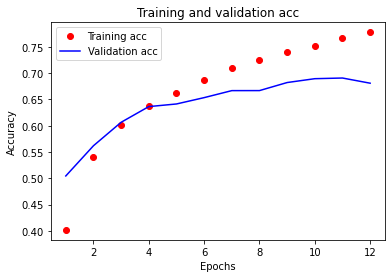

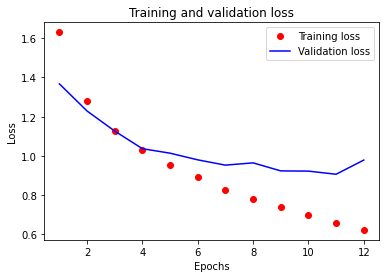

In [58]:
model_twelve = models.Sequential()
model_twelve.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_twelve.add(layers.MaxPooling2D((2, 2)))

model_twelve.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_twelve.add(layers.MaxPooling2D((2, 2)))

model_twelve.add(layers.Conv2D(64, (3, 3), activation='relu'))


model_twelve.add(layers.Flatten())
model_twelve.add(layers.Dense(64, activation='relu'))
model_twelve.add(layers.Dense(10, activation='softmax'))

model_twelve.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_twelve = model_twelve.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_twelve)
plot_loss(history_twelve)

Best model so far try to reduce overfitting try to reduce overfitting by introducing dropout best model so far

## Model 13
<a id="model13"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 29s 839us/sample - loss: 1.7034 - accuracy: 0.3734 - val_loss: 1.4625 - val_accuracy: 0.4781
Epoch 2/50
35000/35000 [==============================] - 29s 830us/sample - loss: 1.3565 - accuracy: 0.5125 - val_loss: 1.2635 - val_accuracy: 0.5532
Epoch 3/50
35000/35000 [==============================] - 29s 822us/sample - loss: 1.2355 - accuracy: 0.5594 - val_loss: 1.1817 - val_accuracy: 0.5827
Epoch 4/50
35000/35000 [==============================] - 28s 808us/sample - loss: 1.1414 - accuracy: 0.5955 - val_loss: 1.1597 - val_accuracy: 0.5871
Epoch 5/50
35000/35000 [==============================] - 28s 802us/sample - loss: 1.0749 - accuracy: 0.6186 - val_loss: 1.0523 - val_accuracy: 0.6326
Epoch 6/50
35000/35000 [==============================] - 30s 861us/sample - loss: 1.0214 - accuracy: 0.6375 - val_loss: 1.0347 - val_accuracy: 0.6369
Epoch 7/50
35000/35000 [====================

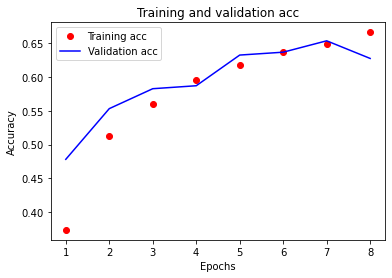

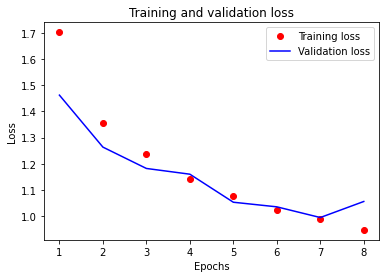

In [61]:
model_thirteen = models.Sequential()
model_thirteen.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_thirteen.add(layers.MaxPooling2D((2, 2)))

model_thirteen.add(layers.Dropout(0.5))

model_thirteen.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_thirteen.add(layers.MaxPooling2D((2, 2)))

model_thirteen.add(layers.Conv2D(64, (3, 3), activation='relu'))


model_thirteen.add(layers.Flatten())
model_thirteen.add(layers.Dense(64, activation='relu'))
model_thirteen.add(layers.Dense(10, activation='softmax'))

model_thirteen.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_thirteen = model_thirteen.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_thirteen)
plot_loss(history_thirteen)

Severe loss of accuracy by 5-6% try batch normilastion next

## Model 14
<a id="model14"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 31s 895us/sample - loss: 1.7105 - accuracy: 0.3747 - val_loss: 1.5278 - val_accuracy: 0.4636
Epoch 2/50
35000/35000 [==============================] - 31s 881us/sample - loss: 1.3823 - accuracy: 0.5044 - val_loss: 1.3075 - val_accuracy: 0.5386
Epoch 3/50
35000/35000 [==============================] - 30s 844us/sample - loss: 1.2526 - accuracy: 0.5517 - val_loss: 1.2554 - val_accuracy: 0.5687
Epoch 4/50
35000/35000 [==============================] - 30s 851us/sample - loss: 1.1594 - accuracy: 0.5882 - val_loss: 1.1653 - val_accuracy: 0.5847
Epoch 5/50
35000/35000 [==============================] - 29s 841us/sample - loss: 1.0927 - accuracy: 0.6111 - val_loss: 1.1282 - val_accuracy: 0.6053
Epoch 6/50
35000/35000 [==============================] - 30s 857us/sample - loss: 1.0405 - accuracy: 0.6311 - val_loss: 1.0861 - val_accuracy: 0.6197
Epoch 7/50
35000/35000 [====================

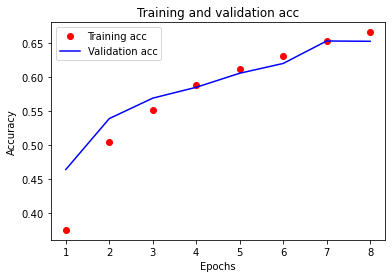

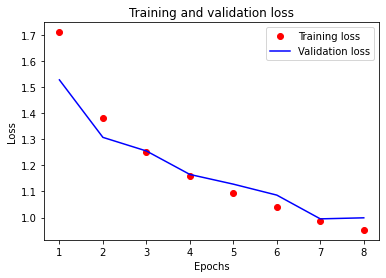

In [63]:
model_fourteen = models.Sequential()
model_fourteen.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_fourteen.add(layers.MaxPooling2D((2, 2)))

model_fourteen.add(layers.Dropout(0.5))

model_fourteen.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_fourteen.add(layers.MaxPooling2D((2, 2)))

model_fourteen.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_seven.add(layers.BatchNormalization())


model_fourteen.add(layers.Flatten())
model_fourteen.add(layers.Dense(64, activation='relu'))
model_fourteen.add(layers.Dense(10, activation='softmax'))

model_fourteen.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_fourteen = model_fourteen.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_fourteen)
plot_loss(history_fourteen)

Good outcome but no real improvement overfitting still not a issue add remove dropout dense layer to see what happens

## Model 15
<a id="model15"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 30s 844us/sample - loss: 1.4365 - accuracy: 0.4816 - val_loss: 1.4761 - val_accuracy: 0.4867
Epoch 2/50
35000/35000 [==============================] - 28s 788us/sample - loss: 1.1071 - accuracy: 0.6019 - val_loss: 1.1676 - val_accuracy: 0.5871
Epoch 3/50
35000/35000 [==============================] - 28s 789us/sample - loss: 0.9757 - accuracy: 0.6531 - val_loss: 1.4123 - val_accuracy: 0.5403


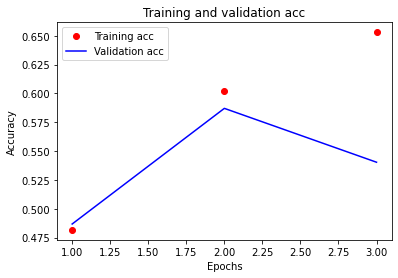

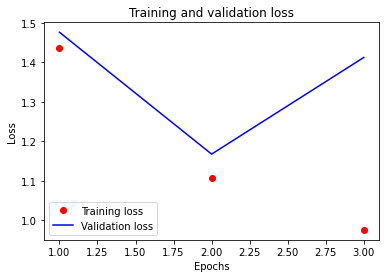

In [73]:
model_fifteen = models.Sequential()
model_fifteen.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_fifteen.add(layers.MaxPooling2D((2, 2)))



model_fifteen.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_fifteen.add(layers.MaxPooling2D((2, 2)))

model_fifteen.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_fifteen.add(layers.BatchNormalization())


model_fifteen.add(layers.Flatten())
model_fifteen.add(layers.Dense(64, activation='relu'))
model_fifteen.add(layers.Dense(10, activation='softmax'))

model_fifteen.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_fifteen = model_fifteen.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_fifteen)
plot_loss(history_fifteen)

I think the images do not output large data values therefore batch normilisation does not work Best model is model 12

# Model 16
<a id="model16"></a>

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 35s 1ms/sample - loss: 1.5238 - accuracy: 0.4480 - val_loss: 1.2991 - val_accuracy: 0.5302
Epoch 2/50
35000/35000 [==============================] - 32s 916us/sample - loss: 1.1723 - accuracy: 0.5834 - val_loss: 1.1137 - val_accuracy: 0.6114
Epoch 3/50
35000/35000 [==============================] - 32s 914us/sample - loss: 1.0035 - accuracy: 0.6433 - val_loss: 1.0028 - val_accuracy: 0.6523
Epoch 4/50
35000/35000 [==============================] - 32s 904us/sample - loss: 0.8729 - accuracy: 0.6917 - val_loss: 0.9455 - val_accuracy: 0.6672
Epoch 5/50
35000/35000 [==============================] - 32s 909us/sample - loss: 0.7662 - accuracy: 0.7304 - val_loss: 0.9577 - val_accuracy: 0.6749
Epoch 6/50
35000/35000 [==============================] - 31s 897us/sample - loss: 0.6703 - accuracy: 0.7627 - val_loss: 0.9244 - val_accuracy: 0.6880
Epoch 7/50
35000/35000 [======================

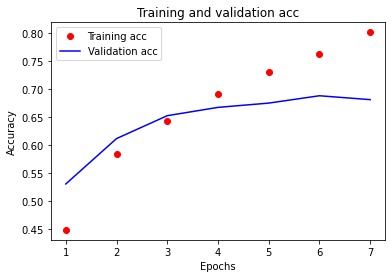

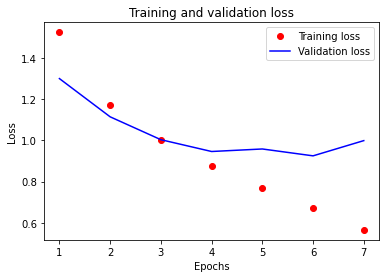

In [85]:
model_sixteen = models.Sequential()
model_sixteen.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_sixteen.add(layers.MaxPooling2D((2, 2)))

model_sixteen.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_sixteen.add(layers.MaxPooling2D((2, 2)))

model_sixteen.add(layers.Conv2D(64, (3, 3), activation='relu'))


model_sixteen.add(layers.Flatten())
model_sixteen.add(layers.Dense(512, activation='relu'))
model_sixteen.add(layers.Dense(10, activation='softmax'))

model_sixteen.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_sixteen = model_sixteen.fit(train_images, train_labels,epochs=50, callbacks = callbacks_list, batch_size=32, validation_split=0.3)

plot_acc(history_sixteen)
plot_loss(history_sixteen)

No real improvement I think model twelve is my best model

# Training on whole data set
<a id="best"></a>


In [90]:
best = models.Sequential()
best.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
best.add(layers.MaxPooling2D((2, 2)))

best.add(layers.Conv2D(64, (3, 3), activation='relu'))
best.add(layers.MaxPooling2D((2, 2)))

best.add(layers.Conv2D(64, (3, 3), activation='relu'))


best.add(layers.Flatten())
best.add(layers.Dense(64, activation='relu'))
best.add(layers.Dense(10, activation='softmax'))

best.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history_best = best.fit(train_images, train_labels,epochs=11,batch_size=32)



test_loss, test_acc = best.evaluate(test_images,test_labels)

Train on 50000 samples
Epoch 1/11
50000/50000 [==============================] - 36s 716us/sample - loss: 1.5157 - accuracy: 0.4506
Epoch 2/11
50000/50000 [==============================] - 35s 705us/sample - loss: 1.1213 - accuracy: 0.6046
Epoch 3/11
50000/50000 [==============================] - 35s 704us/sample - loss: 0.9691 - accuracy: 0.6603
Epoch 4/11
50000/50000 [==============================] - 35s 700us/sample - loss: 0.8725 - accuracy: 0.6932
Epoch 5/11
50000/50000 [==============================] - 35s 702us/sample - loss: 0.7995 - accuracy: 0.7198
Epoch 6/11
50000/50000 [==============================] - 35s 699us/sample - loss: 0.7448 - accuracy: 0.7383
Epoch 7/11
50000/50000 [==============================] - 34s 675us/sample - loss: 0.6978 - accuracy: 0.7549
Epoch 8/11
50000/50000 [==============================] - 34s 683us/sample - loss: 0.6526 - accuracy: 0.7710
Epoch 9/11
50000/50000 [==============================] - 35s 707us/sample - loss: 0.6145 - accuracy: 0.7

Final test accuracy is 70% not bad for images